# Exploring Dandiset 001359: 20250331_AIBS_Patchseq_human

**AI-Generated Notebook: Use with Caution**

> **Disclaimer:** This notebook was automatically generated by AI and has not been manually reviewed or verified. Please use caution when interpreting the code or results. Code, comments, and interpretations may require corrections or improvements.

---

## Overview

This notebook provides an introduction to the [Dandiset 001359 version 0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603), which contains data from patch-seq recordings of human neurons performed by the Allen Institute for Brain Science and collaborators.

**Citation:**  
Gonzalez, Limary; Allen Institute for Brain Science; National Institute of Mental Health; Kalmbach, Brian; Dalley, Rachel; Lein, Ed; Lee, Brian (2025) 20250331_AIBS_Patchseq_human (Version 0.250401.1603) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001359/0.250401.1603

**Description:** HMBA Lein PatchSeq upload (human) (Q1 2025)

- **Keywords:** Patch-seq, human, multimodal
- **Techniques:** Voltage clamp, current clamp, analytical
- **License:** CC-BY-4.0

**Full protocol:** [patch-seq-recording-and-extraction on protocols.io](https://www.protocols.io/view/patch-seq-recording-and-extraction-8epv51n45l1b/v3)

---

## What does this notebook cover?

- Outlines the metadata and structure of the Dandiset
- Shows how to explore assets/files in the dataset
- Demonstrates loading and inspecting one NWB file:
  - Shows key metadata for the recording
  - Overviews electrophysiological timeseries and sweep data structure
  - Demonstrates how to access and plot selected traces from VoltageClampSeries and CurrentClampSeries
  - Provides links to explore the data interactively on DANDI and NeuroSift

**Note:** This notebook covers only a single NWB file for illustration. For full dataset exploration, extend analysis to additional files as needed.

## Python package requirements

The following Python packages are required (should be pre-installed in your environment):

- numpy
- pandas
- matplotlib
- pynwb
- remfile
- h5py

*No pip install commands are included in this notebook. Please ensure all required packages are already available.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynwb
import remfile
import h5py

# For plotting aesthetics (seaborn not used per style policy)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.grid"] = True

## Dandiset overview and links

- **DANDI Dataset:** [001359, version 0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603)
- **Open Access:** Yes
- **Key variables measured:**

| Variable                           | Description                      |
|-------------------------------------|----------------------------------|
| CurrentClampStimulusSeries          | Current clamp stimulus           |
| ProcessingModule                    | Analysis modules (e.g. spikes)   |
| CurrentClampSeries                  | Current clamp recordings         |
| VoltageClampSeries                  | Voltage clamp recordings         |
| VoltageClampStimulusSeries          | Voltage clamp stimulation        |

This Dandiset contains multimodal Patch-seq data from *human* neurons, including raw and processed electrophysiological data and sweeps.

## Listing assets in the Dandiset

Here we show how you can list the first few assets/files in the Dandiset using the [DANDI API client](https://pypi.org/project/dandi/).
For complete exploration, see the DANDI Archive web interface.

```python
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")
```

For this notebook, we analyze the file:  
`sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`

## Selected NWB file for exploration

**File path:** `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`  
**DANDI Asset ID:** `c269347a-2d4b-4b6a-8b7c-2ef303ff503d`

**Download URL:**  
[https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/](https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/)

**Explore on NeuroSift:**  
[Open this file on NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft)

---

The next cells load this NWB file and show its structure.

In [2]:
# Load the NWB file (remote streaming)
url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB file metadata and general information

In [3]:
# Show core metadata about the session/file
print("Session description:", getattr(nwb, "session_description", None))
print("Session start time:", getattr(nwb, "session_start_time", None))
print("Session ID:", getattr(nwb, "session_id", None))
print("Institution:", getattr(nwb, "institution", None))
subject = getattr(nwb, "subject", None)
if subject is not None:
    print("Subject ID:", getattr(subject, "subject_id", None))
    print("Species:", getattr(subject, "species", None))
    print("Age:", getattr(subject, "age", None))
    print("Sex:", getattr(subject, "sex", None))

# Show the file creation date(s)
print("File create date(s):", getattr(nwb, "file_create_date", None))

Session description: PLACEHOLDER
Session start time: 2022-09-06 17:44:39.146000+00:00
Session ID: 1207262032
Institution: Allen Institute for Brain Science
Subject ID: 1203384279
Species: Homo sapiens
Age: P21170.0D
Sex: M
File create date(s): [datetime.datetime(2022, 9, 6, 11, 40, 39, 406000, tzinfo=tzoffset(None, -25200)), datetime.datetime(2022, 9, 6, 11, 40, 39, tzinfo=tzoffset(None, -25200)), datetime.datetime(2022, 9, 6, 11, 40, 39, tzinfo=tzoffset(None, -25200)), datetime.datetime(2022, 9, 6, 11, 40, 49, tzinfo=tzoffset(None, -25200))]


## Summary structure of the NWB file

The NWB file contains:

- **Electrodes:** 1 (Headstage 0)
- **Acquisition data:** VoltageClampSeries and CurrentClampSeries, with named entries like `data_00000_AD0`, each representing a sweep or trial.
- **Stimulus data:** Series such as VoltageClampStimulusSeries, CurrentClampStimulusSeries.
- **Processing modules (e.g., spikes):** Modules with detected spikes per sweep.
- **Intervals:** Epochs (experimental time intervals)
- **Sweep table:** Table grouping PatchClampSeries together.

<details>
<summary>Example NWB file structure</summary>

```
NWBFile
├── Metadata (description, timestamps, subject info)
├── icephys_electrodes: electrode_0
│   └── description, device
├── acquisition:
│   ├── data_00000_AD0 (VoltageClampSeries)
│   ├── data_00001_AD0 (VoltageClampSeries)
│   └── ...
├── stimulus:
│   ├── data_00000_DA0 (VoltageClampStimulusSeries)
│   ├── data_00004_DA0 (CurrentClampStimulusSeries)
│   └── ...
├── processing:
│   └── spikes (ProcessingModule)
│       ├── Sweep_10 (TimeSeries)
│       ├── Sweep_12 (TimeSeries)
│       └── ...
├── intervals: epochs (TimeIntervals)
├── sweep_table (140 rows)
└── devices: device_ITC18USB_Dev_0
```
</details>

Some series (e.g. VoltageClampSeries) contain up to ~12 million data points. Here we show how to access and plot only a subset for visualization.

## Inspecting electrodes (icephys_electrodes)

In [4]:
# List all electrodes and show descriptions
print("--- Electrodes ---")
for name, elec in nwb.icephys_electrodes.items():
    print(f"{name}: {getattr(elec, 'description', '')}, Device: {getattr(getattr(elec, 'device', None), 'description', '')}")

--- Electrodes ---
electrode_0: Headstage 0, Device: Harvard Bioscience (formerly HEKA/Instrutech) Model: ITC18USB


## Listing acquisition series (Voltage/Current Clamp recordings)

The file's acquisition section holds multiple recorded series, such as VoltageClampSeries and CurrentClampSeries, labeled e.g. `data_00000_AD0`.

In [5]:
# List all acquisition series names and their type/unit/size
print("--- Acquisition series ---")
for k, v in nwb.acquisition.items():
    dtype = type(v).__name__
    shape = getattr(getattr(v, "data", None), "shape", None)
    unit = getattr(v, "unit", None)
    print(f"{k}: {dtype}, shape={shape}, unit={unit}")

--- Acquisition series ---
data_00000_AD0: VoltageClampSeries, shape=(161000,), unit=amperes
data_00001_AD0: VoltageClampSeries, shape=(161000,), unit=amperes
data_00002_AD0: VoltageClampSeries, shape=(12297000,), unit=amperes
data_00003_AD0: VoltageClampSeries, shape=(161000,), unit=amperes
data_00004_AD0: CurrentClampSeries, shape=(307375,), unit=volts
data_00005_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00006_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00007_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00008_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00009_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00010_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00011_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00012_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00013_AD0: CurrentClampSeries, shape=(182375,), unit=volts
data_00014_AD0: CurrentClampSeries, shape=(182375,), unit=volts
dat

## Visualize a VoltageClampSeries trace

Here we visualize the first 10,000 datapoints from the first VoltageClampSeries (`data_00000_AD0`).

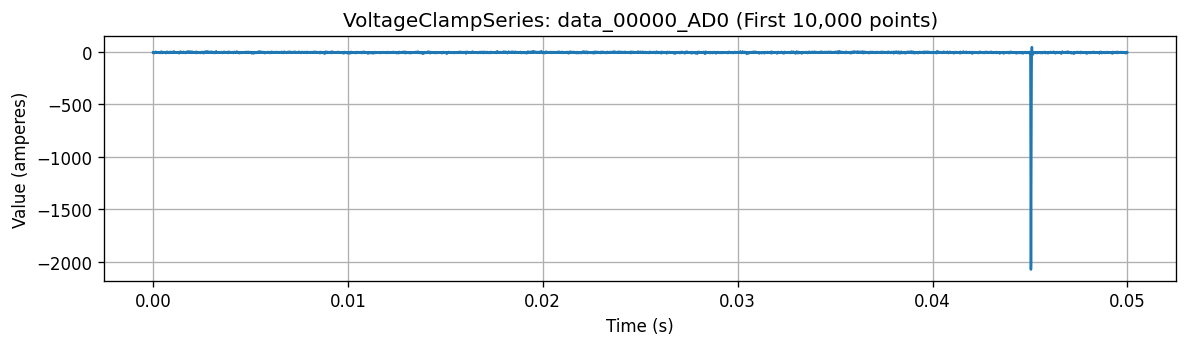

In [6]:
# Visualize a segment of VoltageClampSeries
series = nwb.acquisition.get("data_00000_AD0", None)
if series is not None:
    rate = getattr(series, "rate", None)
    data = series.data[0:10000]
    time = np.arange(0, len(data)) / rate if rate else np.arange(0, len(data))
    plt.figure(figsize=(10, 3))
    plt.plot(time, data)
    plt.xlabel("Time (s)" if rate else "Index")
    plt.ylabel(f"Value ({getattr(series,'unit', '')})")
    plt.title("VoltageClampSeries: data_00000_AD0 (First 10,000 points)")
    plt.tight_layout()
    plt.show()
else:
    print("Series data_00000_AD0 not found.")

## Visualize a CurrentClampSeries trace

Next, we visualize the first 10,000 datapoints from the first CurrentClampSeries (`data_00004_AD0`).

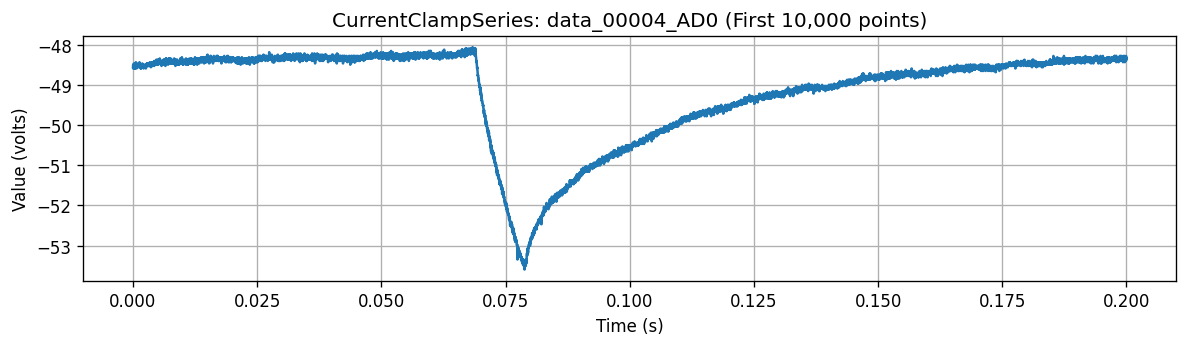

In [7]:
series_cc = nwb.acquisition.get("data_00004_AD0", None)
if series_cc is not None:
    rate = getattr(series_cc, "rate", None)
    data = series_cc.data[0:10000]
    time = np.arange(0, len(data)) / rate if rate else np.arange(0, len(data))
    plt.figure(figsize=(10, 3))
    plt.plot(time, data)
    plt.xlabel("Time (s)" if rate else "Index")
    plt.ylabel(f"Value ({getattr(series_cc,'unit', '')})")
    plt.title("CurrentClampSeries: data_00004_AD0 (First 10,000 points)")
    plt.tight_layout()
    plt.show()
else:
    print("Series data_00004_AD0 not found.")

## Exploring sweeps

The `sweep_table` groups related PatchClampSeries together as sweeps. Here we show the table header and a few example rows.

In [8]:
# Examine sweep_table (show first 5 rows)
try:
    df = nwb.sweep_table.to_dataframe()
    display(df.head())
except Exception as e:
    print("Could not display sweep_table:", e)

,series,sweep_number
id,,
0,[data_00000_AD0 pynwb.icephys.VoltageClampSeri...,0
1,[data_00000_DA0 pynwb.icephys.VoltageClampStim...,0
2,[data_00001_AD0 pynwb.icephys.VoltageClampSeri...,1
3,[data_00001_DA0 pynwb.icephys.VoltageClampStim...,1
4,[data_00002_AD0 pynwb.icephys.VoltageClampSeri...,2


## Epoch intervals (experimental periods)

Show a few rows from epochs, if available.

In [9]:
try:
    epochs_df = nwb.epochs.to_dataframe()
    display(epochs_df.head())
except Exception as e:
    print("Could not display epochs:", e)

,start_time,stop_time,tags,timeseries,treelevel
id,,,,,
1,80.812,80.857,"[Type=Inserted Testpulse, SubType=Baseline, Sh...","[(1, 9000, data_00000_DA0 pynwb.icephys.Voltag...",1.0
2,80.812,80.912,"[Type=Inserted Testpulse, ShortName=TP]","[(1, 20000, data_00000_DA0 pynwb.icephys.Volta...",0.0
3,80.857,80.867,"[Type=Inserted Testpulse, SubType=Pulse, Ampli...","[(9001, 2000, data_00000_DA0 pynwb.icephys.Vol...",1.0
4,80.867,80.912,"[Type=Inserted Testpulse, SubType=Baseline, Sh...","[(11001, 9000, data_00000_DA0 pynwb.icephys.Vo...",1.0
5,80.912,81.412,"[Name=Baseline Chunk, Index=0, ShortName=U_BLC0]","[(20001, 100000, data_00000_DA0 pynwb.icephys....",-1.0


## Processing modules (detected spikes, analysis)

The NWB file may contain a 'spikes' processing module. Here we show available data_interfaces.

In [10]:
if hasattr(nwb, "processing") and "spikes" in nwb.processing:
    spikes = nwb.processing["spikes"]
    data_interfaces = spikes.data_interfaces
    print("--- spikes.data_interfaces ---")
    for name, obj in data_interfaces.items():
        shape = getattr(getattr(obj,"data",None),"shape",None)
        print(f"{name}: {type(obj).__name__}, data shape={shape}")

    # If there's a non-empty sweep, show data size
    for name, obj in data_interfaces.items():
        if hasattr(obj,"data") and hasattr(obj.data,"shape") and obj.data.shape[0]>0:
            print(f"First few values in {name}: {obj.data[:min(5, obj.data.shape[0])]}")
else:
    print("'spikes' processing module not found.")

--- spikes.data_interfaces ---
Sweep_10: TimeSeries, data shape=(0,)
Sweep_12: TimeSeries, data shape=(0,)
Sweep_14: TimeSeries, data shape=(0,)
Sweep_15: TimeSeries, data shape=(0,)
Sweep_17: TimeSeries, data shape=(0,)
Sweep_18: TimeSeries, data shape=(0,)
Sweep_20: TimeSeries, data shape=(0,)
Sweep_21: TimeSeries, data shape=(0,)
Sweep_23: TimeSeries, data shape=(0,)
Sweep_26: TimeSeries, data shape=(0,)
Sweep_33: TimeSeries, data shape=(1,)
Sweep_34: TimeSeries, data shape=(1,)
Sweep_36: TimeSeries, data shape=(1,)
Sweep_37: TimeSeries, data shape=(1,)
Sweep_38: TimeSeries, data shape=(2,)
Sweep_39: TimeSeries, data shape=(7,)
Sweep_41: TimeSeries, data shape=(7,)
Sweep_42: TimeSeries, data shape=(9,)
Sweep_5: TimeSeries, data shape=(0,)
Sweep_62: TimeSeries, data shape=(1,)
Sweep_63: TimeSeries, data shape=(1,)
Sweep_64: TimeSeries, data shape=(1,)
Sweep_65: TimeSeries, data shape=(6,)
Sweep_67: TimeSeries, data shape=(2,)
Sweep_7: TimeSeries, data shape=(0,)
Sweep_9: TimeSeries, 

## Summary & future directions

- This notebook demonstrated how to load, inspect, and visualize Patch-seq electrophysiology data from a single NWB file within Dandiset 001359.
- We explored the structure (electrodes, series, sweeps, epochs, and processing modules) and visualized example data from both voltage and current clamp recordings.

**For your further exploration:**
- Explore additional NWB files and compare results across donors, sessions, and cell types.
- Investigate different acquisition series and their associated sweeps.
- Analyze metadata fields (session_id, subject, protocol) to group results.
- Visit [DANDI](https://dandiarchive.org/dandiset/001359/0.250401.1603) or [NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=draft) for interactive exploration.

---

Please review all code and outputs before relying on results. The original DANDI documentation and raw NWB files contain additional data and context.